# 이산형 확률분포

## 1차원 이산형 확률분포

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 1차원 이산확률분포의 정의

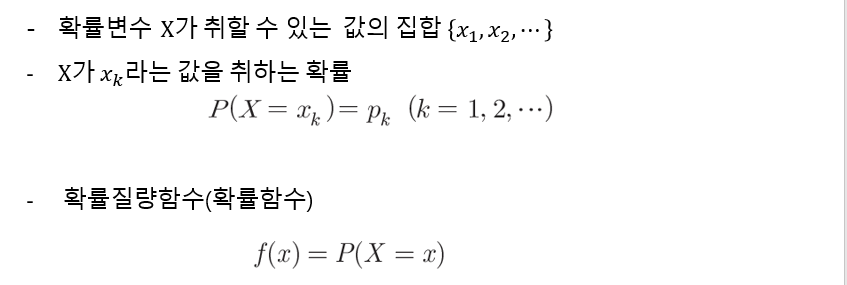

In [4]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [5]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [6]:
X = [x_set, f]

In [7]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

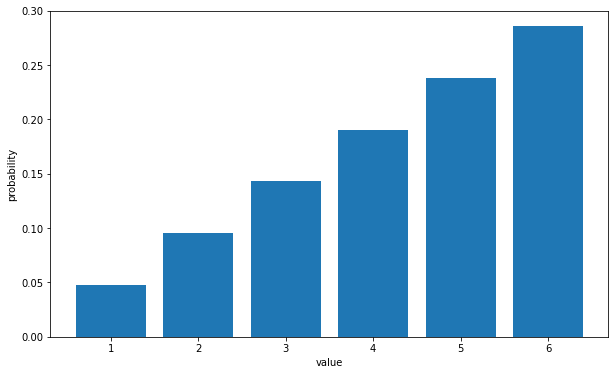

In [8]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

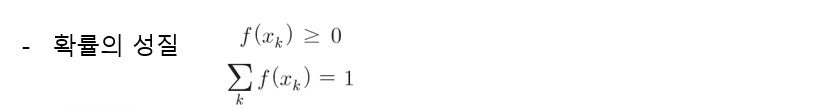

In [9]:
np.all(prob >= 0)

True

In [10]:
np.sum(prob)

1.000

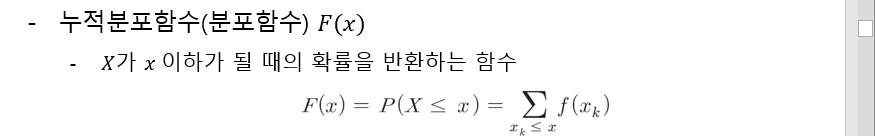

In [11]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [12]:
F(3)

0.286

In [13]:
F(4)

0.476

In [56]:
F(6)

0.952

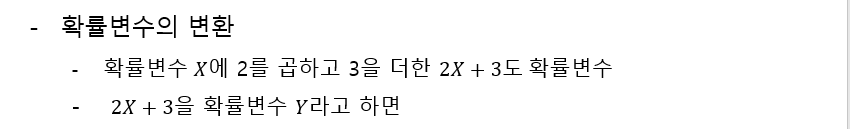

In [14]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표

#### 평균

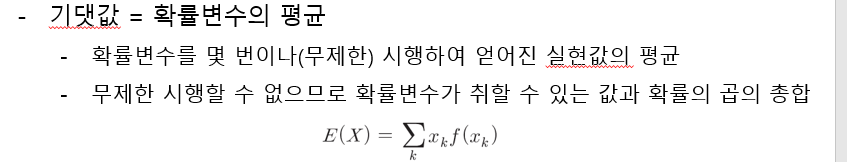

In [15]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [16]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.335

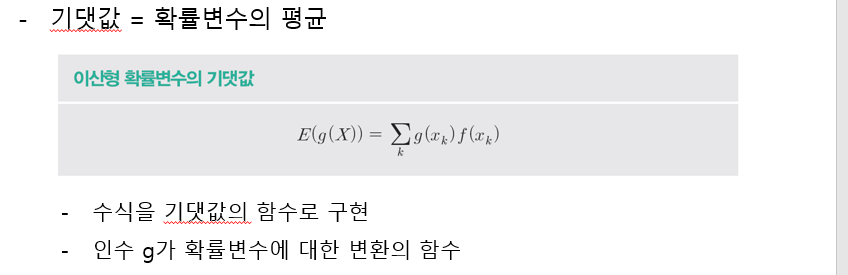

In [17]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [18]:
E(X)

4.333

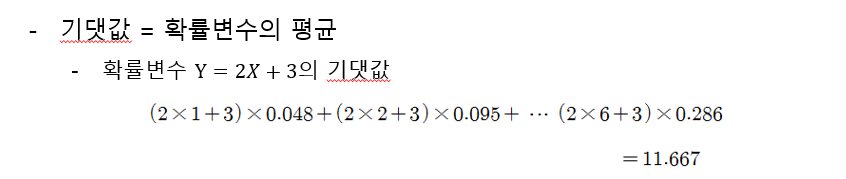

In [19]:
E(X, g=lambda x: 2*x + 3)

11.667

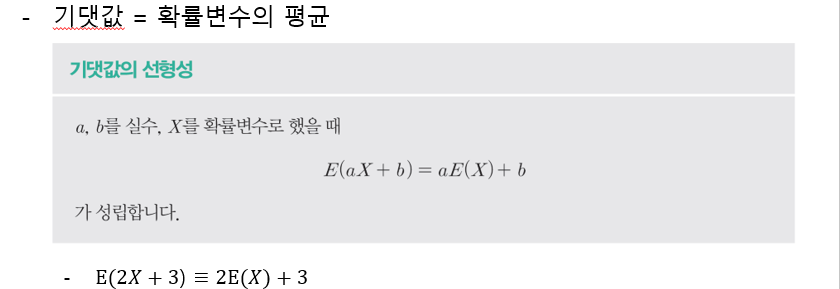

In [20]:
2 * E(X) + 3

11.667

#### 분산

In [21]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

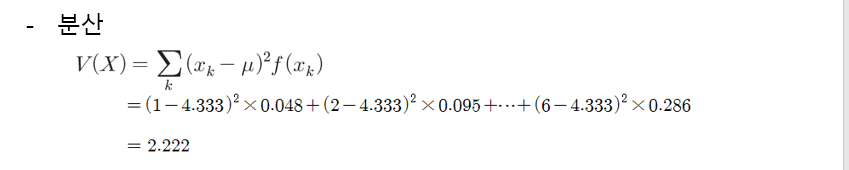

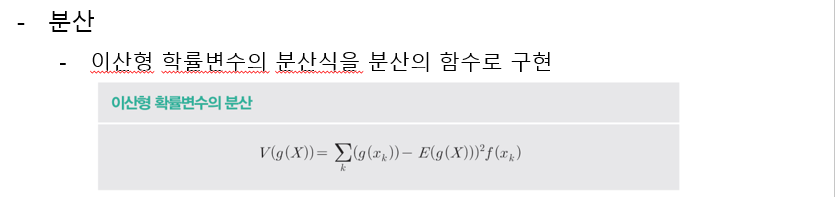

In [22]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [23]:
V(X)

2.222

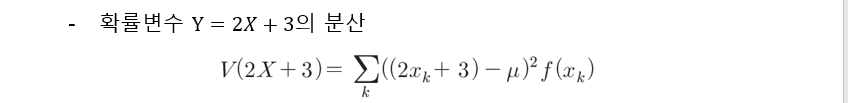

In [24]:
V(X, lambda x: 2*x + 3)

8.889

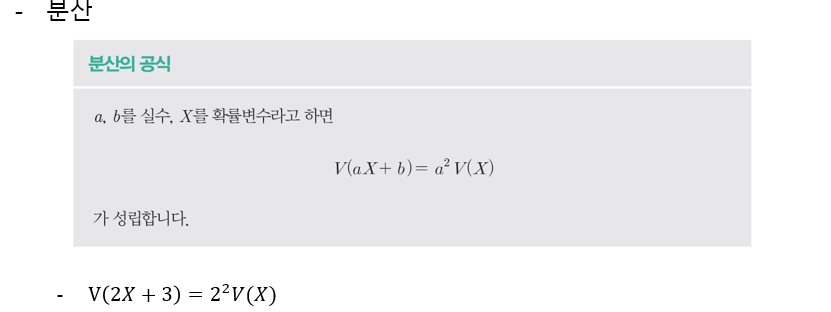

In [25]:
2**2 * V(X)

8.889

## 2차원 이산형 확률분포

### 2차원 이산형 확률분포의 정의

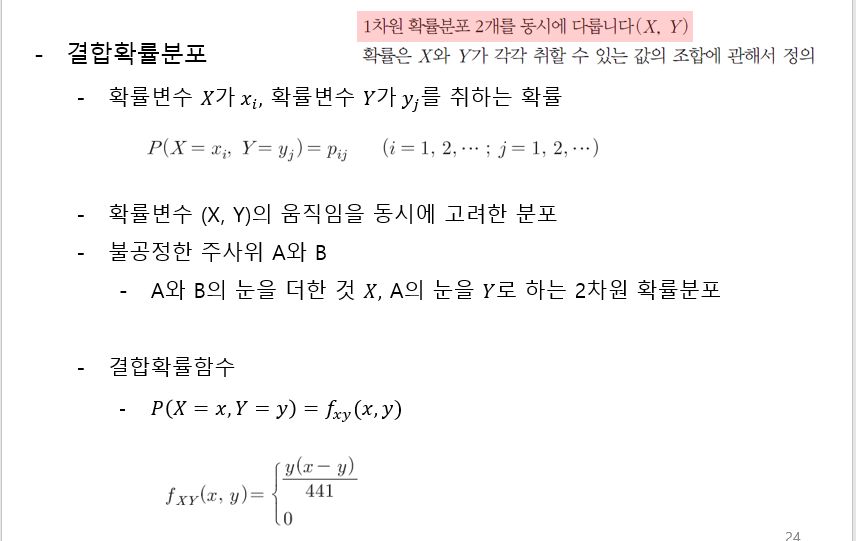

In [26]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [27]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [28]:
XY = [x_set, y_set, f_XY]

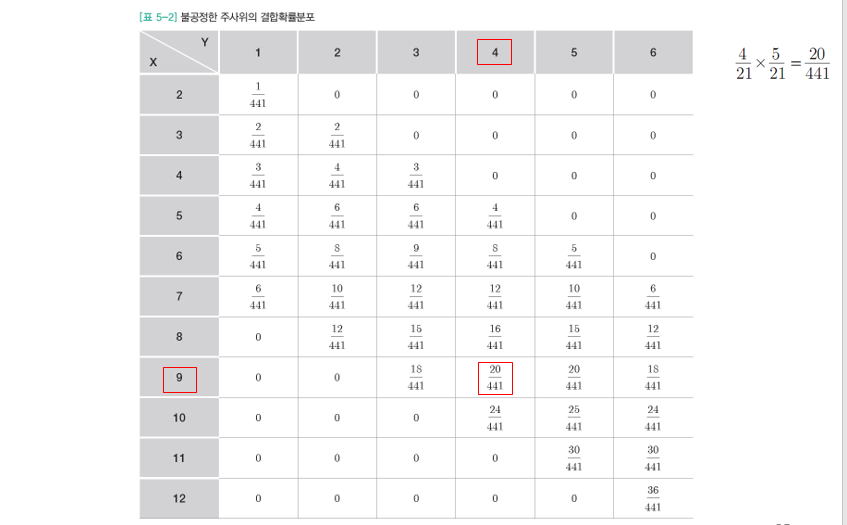

In [66]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

In [67]:
prob.shape

(11, 6)

In [68]:
prob1 = np.array([f_XY(x_i, y_j) for y_j in y_set
                 for x_i in x_set])
prob1

array([0.002, 0.005, 0.007, 0.009, 0.011, 0.014, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.005, 0.009, 0.014, 0.018, 0.023, 0.027,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.007, 0.014, 0.02 ,
       0.027, 0.034, 0.041, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.009, 0.018, 0.027, 0.036, 0.045, 0.054, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.011, 0.023, 0.034, 0.045, 0.057, 0.068,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.014, 0.027, 0.041,
       0.054, 0.068, 0.082])

In [69]:
prob1.shape

(66,)

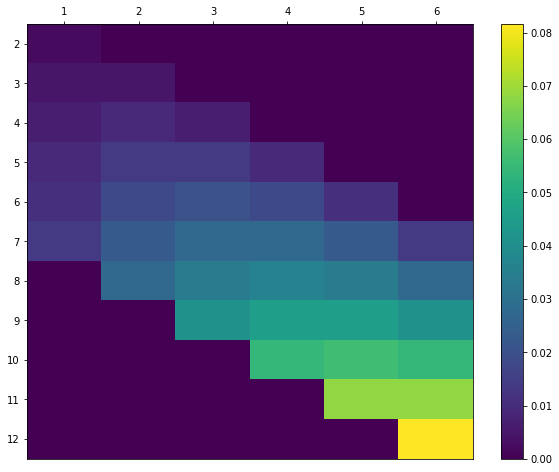

In [31]:
# 확률분포의 히트맵
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [32]:
np.all(prob >= 0)

True

In [33]:
np.sum(prob)

1.000

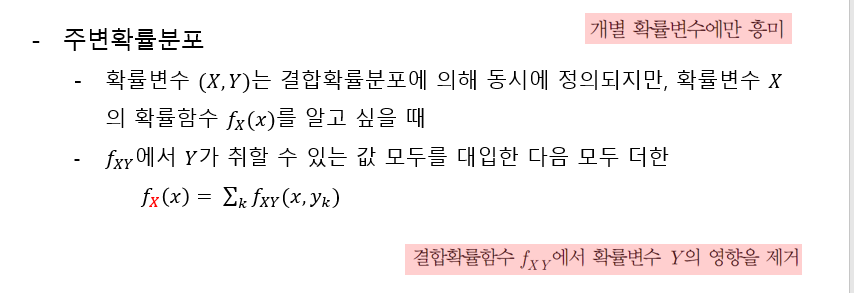

In [34]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [35]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [36]:
X = [x_set, f_X]
Y = [y_set, f_Y]

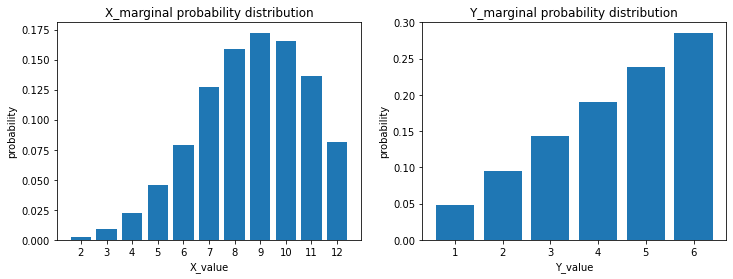

In [37]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률분포의 지표

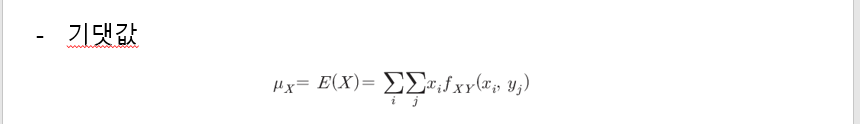

In [38]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

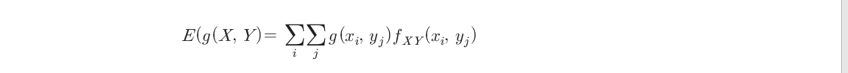

In [39]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [40]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [41]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

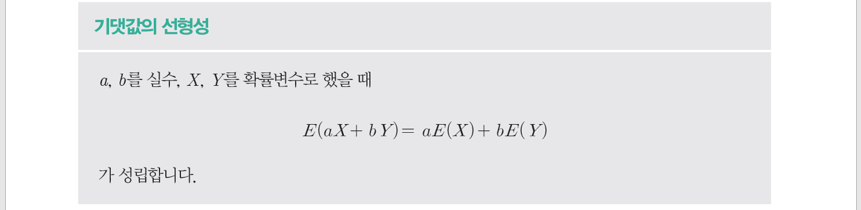

In [42]:
a, b = 2, 3

In [43]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [44]:
a * mean_X + b * mean_Y

30.333

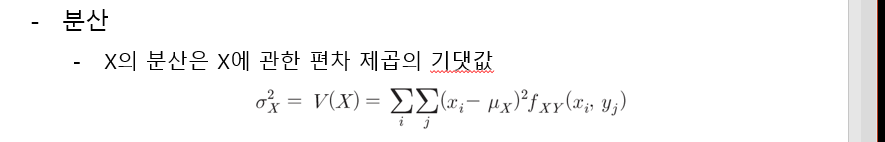

In [45]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444

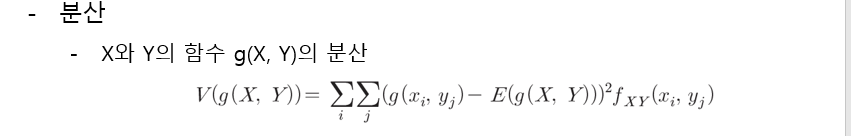

In [46]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [47]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [48]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

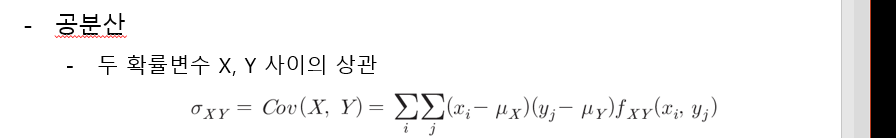

In [49]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [50]:
cov_xy = Cov(XY)
cov_xy

2.222

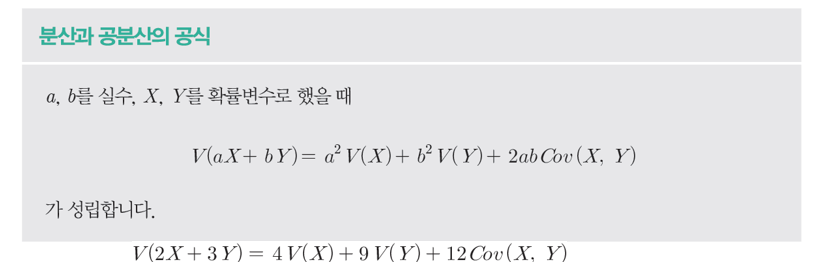

In [51]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [52]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

In [53]:
cov_xy / np.sqrt(var_X * var_Y)

0.707